In [1]:
library(dplyr)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
df <- read.csv(file = "C:\\Users\\Mayer\\Documents\\DataScience\\ML\\Kaggle\\train.csv")

In [3]:
test2<- read.csv(file = "C:\\Users\\Mayer\\Documents\\DataScience\\ML\\Kaggle\\test.csv")

In [4]:
head(df )
dim (df)

,id,season,mnth,year,seasonality.E351,date,holiday,weekday,workingday,weathersit,...,hum.atemp,hum.winspeed,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,cnt
,<int>,<int>,<int>,<int>,<dbl>,<fct>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,1999,-1836.94,1/1/1999,0,6,0,2,...,2.216110,5.022456,0,0,0,0,0,1,0,985
2,2,1,1,1999,-1836.94,1/2/1999,0,0,0,2,...,2.278044,3.242280,0,0,0,0,0,1,0,801
3,3,1,1,1999,-1836.94,1/3/1999,0,1,1,1,...,4.254550,3.245283,1,0,0,0,0,1,0,1349
4,4,1,1,1999,-1836.94,1/4/1999,0,2,1,1,...,3.798913,5.027156,0,0,0,0,0,1,0,1562
5,5,1,1,1999,-1836.94,1/5/1999,0,3,1,1,...,3.514777,4.311573,0,0,0,0,0,1,0,1600
6,6,1,1,1999,-1836.94,1/6/1999,0,4,1,1,...,3.455411,8.997166,0,0,0,0,0,1,0,1606


[1] 365  25

In [5]:
bike.time <- df %>% 
    mutate(year,mnth) %>%
    group_by(year,mnth) %>%
    summarise(n=n(),cnt_mean=mean(cnt,na.rm=T)) %>%
    select(year,mnth,n,cnt_mean)


bike.time$cnt_mean <- ifelse(is.na(bike.time$cnt_mean),0,bike.time$cnt_mean)

bike.ts <- ts(bike.time$cnt_mean, start = c(1999, 1), end=c(2000,12), frequency = 12)

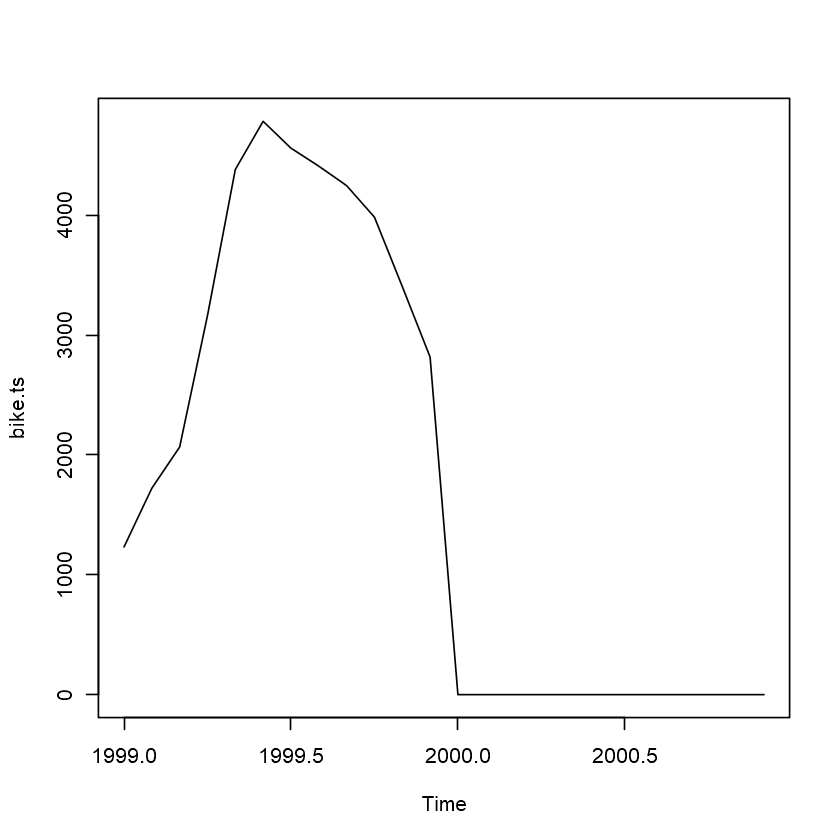

In [19]:
plot(bike.ts)

Warning message in plot.window(...):
"relative range of values (  24 * EPS) is small (axis 2)"


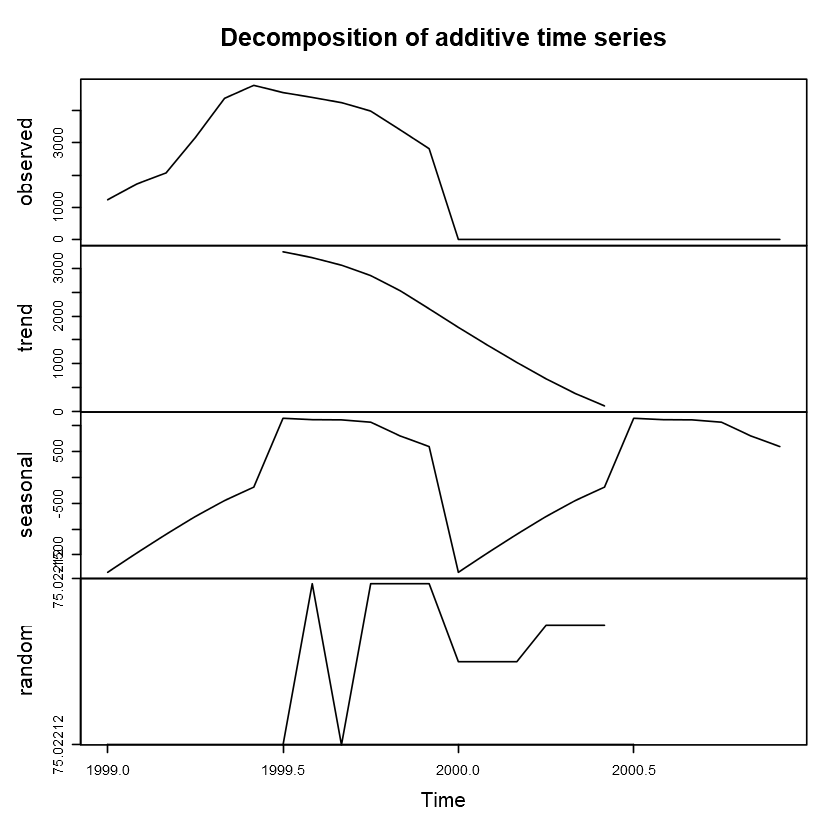

In [21]:
plot(decompose(bike.ts))

In [24]:
bike.dec <- decompose(bike.ts)
bike.dec$seasonal
montly_trend <- data.frame(month=c(1:12),season=bike.dec$seasonal[1:12]) # season=movie.dec$seasonal[1:12]) ts is matrix since we want only the first line we take the first 12 varibles 
montly_trend

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1999,-1836.9397,-1463.2408,-1102.5469,-759.5680,-451.6600,-192.3917,1138.2002,1111.2780,1106.9881,1061.7931,797.4530,590.6346
2000,-1836.9397,-1463.2408,-1102.5469,-759.5680,-451.6600,-192.3917,1138.2002,1111.2780,1106.9881,1061.7931,797.4530,590.6346


month,season
<int>,<dbl>
1,-1836.9397
2,-1463.2408
3,-1102.5469
4,-759.5680
5,-451.6600
6,-192.3917
7,1138.2002
8,1111.2780
9,1106.9881


# DATASET PARTITION

In [6]:
Table1 <- function (x=NULL, y=NULL, rn=NULL, data=NULL, miss=3, catmiss=TRUE, formatted=TRUE, categorize=FALSE,
                    factorVars=NULL, maxcat=10, delzero=TRUE, decimals=1, messages=TRUE, excel=0, excel_file=NULL) {
  ### define sub-functions
  options(warn=-1)
  Del <- NULL
  Pop <- NULL
  n <- NULL
  g1 <- function(var)c(Mean=mean(var,na.rm=TRUE), SD=stats::sd(var,na.rm=TRUE))
  g2 <- function(var)c(Median=stats::median(var,na.rm=TRUE), IQR=stats::quantile(var,c(0.25,0.75),na.rm=TRUE))
  msg <- NULL

  ### function for transforming variables to factors
  setFactors <- function(data=data, factorVars=factorVars, catmiss=catmiss, maxcat=maxcat) {
    #print(factorVars)
    if(is.null(factorVars)==T) {
      aa <- sapply(sapply(data, unique), length)
      factorVars <- names(which(aa <= maxcat))
    }
    #print(factorVars)
    for (v in factorVars) {
      ct <- ifelse( ((is.null(factorVars)==F & (v %in% factorVars)) | (is.null(factorVars)==T & length(unique(data[[v]])) <= maxcat)),1,0)
      if (ct == 1) {
        data[[v]] <- factor(data[[v]])
        if(catmiss == T & sum(is.na(data[[v]])==T) > 0) {
          data[[v]] <- factor(data[[v]],levels=c(levels(data[[v]]),"Missing"))
          data[[v]][which(is.na(data[[v]])==T)] <- "Missing"
        }
      }
    }
    return(data)
  }
  ### proceed to convert varibles to factors
  if (categorize == T | is.null(factorVars)==F ) {
    data <- setFactors(data, factorVars, catmiss, maxcat)
  }

  getSimpleTable  <- function(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,
                              categorize=categorize,maxcat=maxcat, delzero=delzero) {
    if (is.null(x)==TRUE) { x <- names(data)}
    if (is.null(rn)==TRUE) { rn <- x}
    ln <- length(x)
    pb <- utils::txtProgressBar(min=0,max=ln,style=3)
    msg <- NULL
    ### define the column names
    tableaaaa <- cbind(Del="Del",V1="Variables",V2="Categories",n="n","Population")
    tablebbbb <- cbind(Del="Del",V1="Variables",V2="Categories",n="n",val1="val1",val2="val2",val3="val3")
    tbl1 <- cbind(0,"Individuals","n",n=1, nrow(data))
    tbl2 <- cbind(0,"Individuals","n",n=1, nrow(data),NA,NA)
    tableaaaa <- rbind(tableaaaa,tbl1)
    tablebbbb <- rbind(tablebbbb,tbl2)
    q <- 1
    n <- 1
    ii <- 1
    for (v in x)
    {
      if (v %in% names(data)) {
        ### define if the actual variable has to be treated as numeric or factor
        ct <- ifelse(is.numeric(data[[v]])==T & categorize==T &
                       ((is.null(factorVars)==F & (v %in% factorVars)) |
                          (is.null(factorVars)==T & length(unique(data[[v]])) <= maxcat)),1,0)
        ### treat as numeric
        if (length(unique(data[v]))==0) {
          if (messages==T) {
            #print(paste("The variable",v,"has no data... avoided"))
            msg <- c(msg, paste("The variable",v,"has no data... avoided"))
          }
        } else if (inherits(data[[v]], "Date")==TRUE) {
          if (messages==T) {
            msg <- c(msg, paste("The variable",v,"is a date. Dates are not allowed in Table1... avoided"))
          }
        } else if (is.numeric(data[[v]])==T & ct==0) {
          ## report mean and standard deviation
          t_n <- g1(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),")",sep="")
          tbl1 <- cbind(0,rn[q],"Mean (SD)",n=1, tp)
          tbl2 <- cbind(0,rn[q],"Mean (SD)",n=1,t_n[1],t_n[2],NA)
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report median and Interquartile ranges (25%,75%)
          t_n <- g2(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),"-", format(round(t_n[3],decimals),nsmall=1,big.mark=","), ")",sep="")
          tbl1 <- cbind(0,rn[q],"Median (IQR)",n=2, format(tp,big.mark=","))
          tbl2 <- cbind(0,rn[q],"Median (IQR)",n=2,t_n[1],t_n[2],t_n[3])
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report number and percent of missing
          if (miss >= 1) {
            datams <- subset(data,is.na(data[[v]])==T)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=3, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=3, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=3, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=3, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        } else {
          t_n <- table(data[[v]])
          ttotal <- sum(t_n)
          nm <- row.names(t_n)
          for (f in 1:length(nm)) {
            del1 <- ifelse(length(nm)==2 & (nm[f]=="No" | nm[f]=="no" | nm[f]==0 | nm[f]=="0" | nm[f]=="None" | nm[f]=="none"),1,0)
            tp <- t_n[f] / ttotal * 100
            pct <- paste(format(round(t_n[f],decimals),nsmall=0,big.mark=",")," (", format(round(tp,decimals),nsmall=1,big.mark=","), "%)",sep="")
            tbl1 <- cbind(del1,rn[q],nm[f],n=f, pct)             ########### delete rows 0/1 !!!!!!!!!
            tbl2 <- cbind(del1,rn[q],nm[f],n=f, t_n[f], tp, NA)  ########### delete rows 0/1 !!!!!!!!!
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
          if (miss >= 2 & catmiss==F ) {
            datams <- subset(data,is.na(data[[v]])==T)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=f, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=f, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=f, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=f, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        }
      } else {
        if (messages==T) {
          msg <- c(msg, paste("The variable",v,"doesn't exists in the dataset... avoiding"))
        }
      }
      q <- q + 1
      utils::setTxtProgressBar(pb,ii)
      ii <- ii + 1
    }
    if(formatted==TRUE) {
      return(tableaaaa)
    } else {
      return(tablebbbb)
    }
    close(pb)
  }

  pvals <- function(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat) {
    ptab <- NULL
    if (is.null(y)==FALSE) {
      if (y %in% names(data)) {
        if (is.null(x)==TRUE) { x <- names(data)}
        if (is.null(rn)==TRUE | length(rn)<2) {rn <- x}
        q <- 1
        ptab <- cbind(V="Variables",pval="pval", n="n")
        for (v in x) {
          if (v %in% names(data)) {
            ct <- ifelse(is.numeric(data[[v]])==T & categorize==T & length(unique(data[[v]])) <= maxcat,1,0)
            if (is.numeric(data[[y]])==T & categorize==T & length(unique(data[[y]])) <= maxcat) {
              data[[y]] <- as.factor(data[[y]])
            } else if (is.numeric(data[[y]])==T) {
              if (messages==T) {
                msg <- c(msg, paste("The variable",y,"is not a factor. Please convert to factor or change the 'categorize' flag to TRUE."))
              }
              pval <- "Please rerun!!!"
            }
            if (is.numeric(data[[v]])==TRUE & length(unique(data[[v]])) > 1 & ct == 0) {
              ### first check for homoscedasticity
              tryCatch({
                if (stats::bartlett.test(data[[v]], data[[y]])[3] >= 0.05) {
                  pval <- round(as.numeric(car::Anova(stats::lm(data[[v]] ~ data[[y]]))[1, 4]), 3)
                } else {
                  pval <- round(as.numeric(car::Anova(stats::lm(data[[v]] ~ data[[y]]), white.adjust = TRUE)[1, 3]), 3)
                }
              }, error = function(e) {
                pval <- "---"
              })
            } else if (length(unique(data[[v]]))==1) {
              pval <- NA
            } else {
              if (min(table(data[[v]],data[[y]])) > 5) {
                pval <- round(as.numeric(stats::chisq.test(data[[v]],data[[y]])$p.val),3)
              } else {
                if(min(table(data[[v]],data[[y]]))==0) {
                  #in cases where there are cells with zero, we use Fisher's exact test
                  tryCatch(
                    pval <- round(as.numeric(stats::fisher.test(data[[v]],data[[y]], workspace=1e9)$p.val),3),
                    error = function(e) {msg <- c(msg,paste0("Unable to calcualte the Fisher test for variables ",v," and ",y))})
                } else {
                  pval <- round(as.numeric(stats::kruskal.test(data[[v]],data[[y]], workspace=1e9)$p.val),3)
                }
              }
            }
            ptab <- rbind(ptab,cbind(V=rn[q],pval=pval,n=2))
          }
          q <- q + 1
        }
      }
    }
    return(ptab)
  }
  ####################### Begin analysis
  ##### if y is null then make a simple table
  tabaaa1 <- getSimpleTable(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
  tabaaa1 <- tibble::as.tibble(tabaaa1)
  ############################  CHANGE TO 5 !!!!!!!!!!!!!!
  if(length(tabaaa1) > 5) {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop","pop2","pop3")
  } else {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop")
  }
  ##### if y has two levels, then make a compound comparison
  if (is.null(y)==FALSE){
    if (y %in% names(data)) {
      if (is.factor(data[[y]])==F) {
        if (length(levels(factor(data[[y]]))) > 8) {
          if (messages==T) {
            print("The dependent variable has more than 8 levels, table too large!")
          }
        } else if(min(table(data[[y]]))==0) {
          print("The dependent variable has one or more levels with no individuals assigned!")
        } else {
          data[[y]] <- factor(data[[y]])
        }
      }
      if (length(levels(data[[y]])) >= 2) {
        for (lv in levels(data[[y]])) {
          dtsub <- subset(data, data[[y]]==lv)
          tab <- getSimpleTable(x=x, rn=rn, data=dtsub, miss=miss, catmiss=catmiss, formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
          tab <- data.frame(tab)
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          if(length(tab) > 5) {
            names(tab) <- c("Del","V1","V2","n",paste0(lv,"_1"),paste0(lv,"_2"),paste0(lv,"_3"))
          } else {
            names(tab) <- c("Del","V1","V2","n",lv)
          }
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          tab[1,5] <- lv
          tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, tab))
        }
        # what to do with dichotomous variables? We remove the "Zero" label...
        # clean unnecesary rows
        if (delzero == TRUE) {
          tabaaa1 <- tabaaa1 %>%
            dplyr::filter(Del==0)
        }
        ### calculate the p-value
        ptab <- data.frame(pvals(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat))
        names(ptab) <- c("V1","pval","n")
        tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, ptab))

        tabaaa1 <- tabaaa1 %>% dplyr::filter(Pop != " -- ") #%>%
      }
    }
  }
  tabaaa1 <- tabaaa1 %>% dplyr::select(-n) %>% dplyr::select(-Del)
  ##### Join the tables...
  Sys.setenv(JAVA_HOME="")
  if (excel==1) {
    wb <- xlsx::createWorkbook()
    sheet1 <- xlsx::createSheet(wb, sheetName="Table 1")
    xlsx::addDataFrame(tabaaa1,sheet1)
    #### save and close the workbook
    xlsx::saveWorkbook(wb, excel_file)
    return(tabaaa1)
  } else {
    return(tabaaa1)
  }
}

########################## END Table1 ###############

############################################################################
#####   TEST & TRAIN DATASET GENERATION                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=FALSE)
{
  pval <- NULL
  checkTrainTest <- function(train=NULL,test=NULL) {
    train[["traintest_ind_"]] <- 1
    test[["traintest_ind_"]] <- 2
    df <- rbind(train, test)
    tab <- Table1(data=df, y="traintest_ind_",messages = F)
    vars <- subset(tab, pval < 0.05)$V1
    vars <- setdiff(vars,"traintest_ind_")
    if (length(vars)==0) {
      message("You got a perfectly balanced training and test datasets")
      message(" ")
    } else {
      message("WARNING: The following variables are not balanced between the training and test datasets:")
      for (v in vars) { message(paste("*",v)) }
      message("You can try to change the seed value until you get a balanced partition.")
      message("Alternatively, you can ommit this warning and exclude those variables from your model")
      message(" ")
    }
    return(tab)
  }
  nm <- 1
  ttenv = as.environment(nm)
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=ttenv)
  assign(test_name, data[-train_ind, ], envir=ttenv)
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
    tab = checkTrainTest(get(train_name),get(test_name))
    return(tab)
  }
}


######################### END train_test ###############


############################################################################
#####   TABLE 2                                                         ####
#####   Description: calculates the Odds/Hazard ratios and their        ####
#####     confidence intervals from a given model
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-04-16                                       ####
############################################################################

Table2 <- function(mod, rv=NULL,level=0.95, decimals=3) {
  alpha <- 1-level
  msm <- suppressMessages(summary(mod))
  if(rlang::has_name(msm,"coefficients")==T) {
    msm <- msm$coefficients
  } else if(rlang::has_name(msm,"coef")==T) {
    msm <- msm$coef
  }
  if("coxph" %in% class(mod)) {
    exp_coef <- msm[,1]
    dd <- suppressMessages(exp(stats::confint(mod, level=level)))
    dd1 <- round(dd[,1],decimals)
    dd2 <- round(dd[,2],decimals)
    p_value <- round(msm[,ncol(msm)],decimals)
  } else {
    ciz <- stats::qnorm(1-(alpha/2))
    exp_coef <- exp(msm[, 1])
    se_exp_coef <- msm[,2] * exp_coef
    dd1 <- round(exp_coef - ciz * se_exp_coef, decimals)
    dd2 <- round(exp_coef + ciz * se_exp_coef, decimals)
    exp_coef <- round(exp_coef, decimals)
    z<- abs((exp_coef-1)/se_exp_coef)
    p_value <- round(2*(1-stats::pnorm(z)), decimals)
  }
  tb <- data.frame(cbind(Estimate=exp_coef,'CI_lo'=dd1,'CI_hi'=dd2,'p value'=p_value))
  if (is.null(rv)==FALSE) {
    row.names(tb) <- rv
  }
  return(tb)
}


In [ ]:
train_test(data=df,train_name="train",test_name="test",prop=0.7,seed=1,tableone=TRUE)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test



  |======================================================================| 100%

# MODELS

In [ ]:
### The error we will use is the RMSE(root mean square error) and RMSLE(root mean square log error)
rmse <- function(y,y_hat) {
    err <- sqrt(sum((y_hat-y)^2,na.rm=T)/length(y))
    return(err)
}

rmsle <- function(y,y_hat) {
    err <- sqrt(sum((log(y_hat+1)-log(y+1))^2,na.rm=T)/length(y))
    return(err)
}


In [ ]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
#new dataframe for error results
err_res <- NULL

## Linear Models

In [9]:
## model with only the original variables
mod1 <- lm(cnt ~., data=train)
summary(mod1)


Call:
lm(formula = cnt ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2355.97  -412.85    43.26   475.33  1682.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1776.947    333.224   5.333 2.21e-07 ***
id             -8.897      5.081  -1.751 0.081218 .  
season        331.329     72.286   4.584 7.31e-06 ***
mnth          282.931    156.931   1.803 0.072643 .  
holiday      -307.482    286.070  -1.075 0.283509    
weekday        20.341     22.033   0.923 0.356822    
workingday     80.906     98.336   0.823 0.411455    
weathersit   -564.717    109.781  -5.144 5.54e-07 ***
temp         7413.759   2930.912   2.530 0.012056 *  
atemp       -3266.087   3325.336  -0.982 0.326987    
hum          -524.070    449.134  -1.167 0.244416    
windspeed   -2528.840    646.437  -3.912 0.000119 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 715.9 on 243 degrees of freedom
Multiple R-

In [211]:
pred1a <- predict(mod1,newdata=train)
pred1b <- predict(mod1,newdata=test)
rmse(train$cnt,pred1a)
rmse(test$cnt,pred1b)
rmsle(train$cnt,pred1a)
rmsle(test$cnt,pred1b)
err_res <- rbind(err_res, data.frame(Name="Base Linear regression", Model="mod1", 
                                    train_RMSE=rmse(train$cnt,pred1a),
                                    test_RMSE=rmse(test$cnt,pred1b),
                                    train_RMSLE=rmsle(train$cnt,pred1a),
                                    test_RMSLE=rmsle(test$cnt,pred1b)))

[1] 698.8789

[1] 618.7156

[1] 0.2715008

[1] 0.2376927

In [125]:
Pred1 <- predict(mod1,test2, type="response")
Pred1

1            2            3            4            5            6 
 -762.235411 -1558.946126 -1782.172455 -2156.247927  -844.865795  -634.118851 
           7            8            9           10           11           12 
 -441.778923  -829.153061 -1728.472063  -953.945204 -1608.486818 -1220.047550 
          13           14           15           16           17           18 
-1357.754559 -1399.865850 -1701.504849 -1923.227288 -1697.397034 -1372.005626 
          19           20           21           22           23           24 
-1457.040099 -1838.506669 -2335.006599 -2428.511500 -2021.532643  -864.695708 
          25           26           27           28           29           30 
-1027.945291 -1273.272715 -1503.899599 -1090.167755 -1245.248174 -1204.373772 
          31           32           33           34           35           36 
 -809.449124   -70.335849 -1003.609502  -672.453913 -1540.944157 -1721.510558 
          37           38           39           40           41           42 
 -953.689692  -540.744868 -1591.866826 -1007.688949 -1340.123357 -2661.716108 
          43           44           45           46           47           48 
-2185.434825 -1161.386869 -1329.391018  -708.763731 -1314.818569  -838.411785 
          49           50           51           52           53           54 
 -805.424722 -1849.999187 -1541.189441 -1140.537682  -705.837923  -313.894933 
          55           56           57           58           59           60 
-1317.655286 -1466.569428 -1185.411413  -938.331809  -729.546535 -1554.329986 
          61           62           63           64           65           66 
  -82.585500 -1055.114762  -870.918803 -1055.752101 -1159.633366  -985.537009 
          67           68           69           70           71           72 
 -713.831319  -514.267814 -1364.237833  -885.873121  -792.244482  -217.121711 
          73           74           75           76           77           78 
  109.962666   524.534222   350.298439  -834.276045  -496.258267  -871.350840 
          79           80           81           82           83           84 
   51.413152   223.893362   -58.520961   548.593880   296.762684  -529.365170 
          85           86           87           88           89           90 
-1049.747856  -543.770147  -435.157435  -102.978007  -103.179163  -843.608851 
          91           92           93           94           95           96 
-1029.176022  -619.725348  -199.778250   536.109013   625.885197   133.112256 
          97           98           99          100          101          102 
 -164.285646    33.007819   244.449503   -31.409919    10.528589  -515.337354 
         103          104          105          106          107          108 
 -292.464559   279.864570   276.903985   604.208939   421.249480   578.900039 
         109          110          111          112          113          114 
 -413.719272   539.507273   431.485556   262.590138 -2015.838262 -1486.309829 
         115          116          117          118          119          120 
 -270.132642   342.448560  -412.064256  -283.526093  -767.679867    16.321544 
         121          122          123          124          125          126 
 -566.984355   435.901728   748.899725   192.967540  1037.552614   394.749911 
         127          128          129          130          131          132 
  -34.544894  -228.233703  -164.910992   -17.605601    99.512099   515.440754 
         133          134          135          136          137          138 
  821.144325   608.388677  -119.316112   252.275795  1063.438120   652.665729 
         139          140          141          142          143          144 
  750.645680  1064.064260   562.094216  -110.970797   289.243186   374.044554 
         145          146          147          148          149          150 
  976.255101  1170.871837  1004.397059   836.718859   641.869007   882.025219 
         151          152          153          154          

In [126]:
write.table(Pred1, file = "prediction-2-Linear model-2020-28-01.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

## Desicion trees

In [13]:
library(rpart)

In [14]:
mod2 <- rpart(cnt ~., data=train)
mod2

n= 255 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 255 479984400 3423.173  
   2) temp< 0.457917 114 114566400 2282.895  
     4) id< 92.5 58  15059540 1613.448  
       8) id< 44.5 32   4433730 1319.062 *
       9) id>=44.5 26   4439407 1975.769 *
     5) id>=92.5 56  46592150 2976.250  
      10) hum>=0.8316665 9   5549160 1907.778 *
      11) hum< 0.8316665 47  28800800 3180.851  
        22) id>=356.5 7   3531885 2069.857 *
        23) id< 356.5 40  15116740 3375.275 *
   3) temp>=0.457917 141  97348550 4345.099  
     6) hum>=0.780417 24  26722870 3502.458  
      12) windspeed>=0.231654 7   6495021 2772.143 *
      13) windspeed< 0.231654 17  14956990 3803.176 *
     7) hum< 0.780417 117  50089030 4517.949  
      14) id< 109 7   1367112 3051.571 *
      15) id>=109 110  32712240 4611.264  
        30) atemp>=0.7111815 15   2206266 3986.133 *
        31) atemp< 0.7111815 95  23718610 4709.968 *

In [212]:
pred2a <- predict(mod2,newdata=train)
pred2b <- predict(mod2,newdata=test)
rmse(train$cnt,pred2a)
rmse(test$cnt,pred2b)
rmsle(train$cnt,pred2a)
rmsle(test$cnt,pred2b)
err_res <- rbind(err_res, data.frame(Name="Decision Trees-rpart", Model="mod2", 
                                    train_RMSE=rmse(train$cnt,pred2a),
                                    test_RMSE=rmse(test$cnt,pred2b),
                                    train_RMSLE=rmsle(train$cnt,pred2a),
                                    test_RMSLE=rmsle(test$cnt,pred2b)))

[1] 566.4299

[1] 606.8355

[1] 0.247059

[1] 0.2612729

## Random Forest

In [16]:
library(ranger)

In [131]:
help("ranger")

In [17]:
mod3 <- ranger(cnt ~., data=train)
mod3

Ranger result

Call:
 ranger(cnt ~ ., data = train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      255 
Number of independent variables:  11 
Mtry:                             3 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       284366.3 
R squared (OOB):                  0.8495179 

In [19]:
getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

In [20]:
getMissingness(df)

[[1]]
[1] var      na.count rate    
<0 rows> (or 0-length row.names)

[[2]]
[1] "This dataset has 365 (100%) complete rows. Original data has 365 rows."



var,na.count,rate
<fct>,<dbl>,<dbl>


In [22]:
mod3 <- ranger(cnt ~., data=train)
mod3

Ranger result

Call:
 ranger(cnt ~ ., data = train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      255 
Number of independent variables:  11 
Mtry:                             3 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       283294.5 
R squared (OOB):                  0.8500851 

In [213]:
pred3a <- predict(mod3,train)
pred3b <- predict(mod3,test)
rmse(train$cnt,pred3a$predictions)
rmse(test$cnt,pred3b$predictions)
rmsle(train$cnt,pred3a$predictions)
rmsle(test$cnt,pred3b$predictions)
err_res <- rbind(err_res, data.frame(Name="RandomForest (ranger)", Model="mod3", 
                                    train_RMSE=rmse(train$cnt,pred3a$predictions),
                                    test_RMSE=rmse(test$cnt,pred3b$predictions),
                                    train_RMSLE=rmsle(train$cnt,pred3a$predictions),
                                    test_RMSLE=rmsle(test$cnt,pred3b$predictions)))

[1] 249.1603

[1] 483.5047

[1] 0.1439475

[1] 0.2409524

In [24]:
pred3a

Ranger prediction

Type:                             Regression 
Sample size:                      255 
Number of independent variables:  11 

In [146]:
pred3 <- predict(mod3,test2, type="response")
p3 <- pred3$predictions




In [147]:
write.table(p3, file = "prediction-4-Random-Forest-2020-28-01.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

## XGBoost

In [26]:
#install.packages("xgboost")
library(xgboost)

Installing package into 'C:/Users/Mayer/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Mayer\AppData\Local\Temp\Rtmpgx8VtJ\downloaded_packages



Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




In [197]:
train1 <- Matrix::sparse.model.matrix(cnt ~ ., data = train)
test1 <- Matrix::sparse.model.matrix(cnt ~ ., data = test)

In [198]:
dim(train1)
dim(train)

[1] 255  12

[1] 255  12

In [199]:
#X_test <- xgb.DMatrix(test1)
X_train <- train1
y_train <- train$cnt
mod4 <- xgboost(data=X_train,label=y_train, nrounds=150,print_every_n = 10 )

[1]	train-rmse:2631.948730 
[11]	train-rmse:182.997833 
[21]	train-rmse:71.005249 
[31]	train-rmse:37.889816 
[41]	train-rmse:19.958900 
[51]	train-rmse:12.627354 
[61]	train-rmse:6.354052 
[71]	train-rmse:4.173585 
[81]	train-rmse:2.612051 
[91]	train-rmse:1.500490 
[101]	train-rmse:0.974435 
[111]	train-rmse:0.584015 
[121]	train-rmse:0.365750 
[131]	train-rmse:0.228590 
[141]	train-rmse:0.132676 
[150]	train-rmse:0.095673 


In [214]:
pred4a <- predict(mod4,train1)
pred4b <- predict(mod4,test1)
rmse(train$cnt,pred4a)
rmse(test$cnt,pred4b)
rmsle(train$cnt,pred4a)
rmsle(test$cnt,pred4b)
err_res <- rbind(err_res, data.frame(Name="XGBoost", Model="mod4", 
                                    train_RMSE=rmse(train$cnt,pred4a),
                                    test_RMSE=rmse(test$cnt,pred4b),
                                    train_RMSLE=rmsle(train$cnt,pred4a),
                                    test_RMSLE=rmsle(test$cnt,pred4b)))

[1] 0.09567229

[1] 468.7614

[1] 3.256651e-05

[1] 0.2309931

In [201]:
pred4b

[1] 1325.5002 1511.9519 1296.0146 1423.6376 1030.2120 1304.4348  975.6086
  [8] 1296.1230 1375.4230  916.1136  790.4783 1408.7233 1956.2821 2011.6282
 [15] 1942.0123 1973.3969 1890.4802 1828.5420 2020.2020 1974.3143 2040.7452
 [22] 1622.4569 1968.9353 1822.0023 1856.3793 1867.7839 2471.7607 2580.7192
 [29] 1851.7695 2173.7014  987.7206 3024.0037 2175.0164 3866.7261 2465.9509
 [36] 4221.9399 4481.0024 4401.1704 4614.9497 4375.4370 5183.2637 4694.8491
 [43] 4658.3638 3896.0583 4321.1729 5012.0410 4596.6489 4260.2998 4488.6333
 [50] 5050.7241 4878.2251 4750.4336 4937.8911 4521.9648 4853.5918 4997.1489
 [57] 4701.2075 5189.0864 5042.2153 4325.5879 4575.7192 4426.5479 4291.3857
 [64] 4997.2295 5164.9751 4212.6147 4456.0000 4244.7212 4366.5317 4797.0967
 [71] 3409.8159 4495.4253 4881.0518 4665.9106 4874.0850 4985.2583 4173.2930
 [78] 5035.5786 4451.1899 4256.9736 4620.4224 4486.1421 4002.5376 5308.3760
 [85] 2724.7944 3751.9563 4889.3472 4099.2817 4348.9658 3919.5703 3903.8408
 [92] 3247.9631 1355.9890 4114.4907 3706.6785 4076.8599 2844.7554 4138.8604
 [99] 4397.3257 3033.2903 3338.8535 3614.2095 3552.7690 3261.1870 3230.9087
[106] 2052.5310 2985.4775 3377.9373 2498.4741 2107.4648

In [185]:
write.table(pred4a, file = "prediction-1-XGBoost-2020-28-01.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

In [113]:
write.table(pred4b, file = "prediction-1.2-XGBoost-2020-28-01.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

In [202]:
testxg <- Matrix::sparse.model.matrix(cnt ~ ., data = test2)



In [203]:
Pred4 <- predict(mod4,testxg, type="prob")
Pred4

[1] 1414.3214  966.5296 1706.2102 1844.8684 2430.5063 2731.9558 2471.7988
  [8] 1944.5093 2479.9309 2164.2139 2529.3906 2066.1270 2222.7495 1556.6179
 [15]  968.1875  986.5005 1685.2197 2218.2229 1831.8658 1895.9008 1450.9072
 [22]  899.9282 2195.5105 2594.2144 2102.1453 2615.2329 1708.3083 2559.6948
 [29] 1645.8890 2282.5212 2556.8228 3867.4597 2193.6990 2771.9556 2122.9668
 [36]  849.1503 2400.3557 2667.5068 2550.7139 2318.6794 2802.5544 1043.8129
 [43]  953.2430 1838.2317 2782.8613 2713.0952 2686.2615 2834.2869 2572.6401
 [50] 1664.5887 1190.4734 2703.6099 2714.0063 2650.9041 2077.1511 2347.0649
 [57] 1467.6824 2411.5498 2716.9231 2040.5387 4018.5671 2137.4102 2494.3757
 [64] 1827.0248 1876.2426 2322.5740 2323.2039 3232.7097 2307.1272 2314.4673
 [71] 1884.7964 3703.3228 3954.9341 3917.4175 3922.8613 2636.2019 4063.3694
 [78] 3552.3091 3906.1890 3708.7009 3773.3511 3889.9529 4085.7480 3658.1072
 [85] 1716.0314 2489.2764 2965.4883 3791.7734 3899.0256 2886.4351 2095.4937
 [92] 1575.4513 2466.4839 3994.0076 3973.0496 2872.2737 2678.7837 2733.1282
 [99] 3831.5369 2857.8101 2833.7188 2849.6650 2706.5950 2858.4468 3910.5022
[106] 3947.5298 2987.3792 3811.1555 3534.6731 4148.7969 4044.1492 3958.4885
[113] 1232.2789 2104.9612 2825.8560 3959.7263 3682.0696 2712.7231 2740.7148
[120] 3519.0847 3386.4575 3747.5718 4030.9890 3718.7803 3890.3989 4055.2659
[127] 3931.4172 3673.7803 3779.6035 3767.7139 3848.7859 3995.7141 4120.6221
[134] 3944.7324 3864.0227 3747.5239 3804.5576 4001.8347 4019.3562 4057.4385
[141] 3937.0454 3873.0657 3757.7678 3868.0913 3870.6226 4148.5864 3946.6057
[148] 3666.1309 3183.3623 3778.3970 3806.1719 4050.2214 3766.7119 4009.4094
[155] 3934.0278 3694.6934 3881.2488 4365.7344 3989.7512 4086.1433 3936.3374
[162] 3921.2981 3674.6562 3773.2000 3897.1980 4135.0269 4140.0459 3975.0186
[169] 3907.7483 3924.2593 3948.4358 3910.5486 3787.1934 3982.6182 4021.7124
[176] 3807.4448 3682.9001 3846.1660 4022.7593 3993.8784 3702.2373 4078.9595
[183] 3589.7463 3904.9233 4142.6797 2925.8289 3790.0615 3725.8218 3196.1931
[190] 3681.1343 3735.2114 3891.1584 4064.9211 3978.1826 4330.4756 3911.6333
[197] 3601.8120 3599.9180 3705.0674 3842.1023 3933.6299 3747.8699 2287.6655
[204] 4014.6184 3891.5593 3649.5212 3966.3113 3827.6736 4048.5613 4102.9839
[211] 4010.9976 3914.7800 3882.2527 3908.6562 4009.5393 3706.1938 3942.7520
[218] 3694.5522 3639.1194 3735.9363 3924.4185 4149.9590 3638.2327 3722.8135
[225] 4066.2681 3792.9299 4009.9841 4021.3120 4016.6558 3626.5996 4146.6626
[232] 3860.7842 3911.2390 4438.7661 4481.3721 4101.3926 4534.6255 3634.8953
[239] 3614.3218 4084.8628 4080.7327 3942.6692 4443.1230 4169.0903 4155.3159
[246] 4393.2114 3118.2664 3949.0884 4056.0625 3904.1421 3981.6367 3695.9971
[253] 3998.5869 3913.4390 3887.1677 4056.3198 4149.3984 4131.1289 4040.2166
[260] 4025.1609 4090.3459 3039.9895 3777.1628 4129.2915 4342.8706 3906.7478
[267] 4033.1628 3781.0986 3938.0029 4046.2280 3901.7986 3767.5774 4069.1836
[274] 4064.7207 3843.1946 2487.2971 4487.2881 3917.8975 4224.5791 3728.4917
[281] 1723.3925 1624.9343 2412.5984 4010.2080 3023.2791 2967.7095 2844.5222
[288] 3937.3220 3432.4155 3979.2756 2942.6497 3696.4517 4002.3291 4029.4175
[295] 3234.6140 3958.6738 3897.4541 4355.8257 3598.7473 3859.7559 3712.5818
[302] 2359.4705 1471.5349 2388.2742 2402.6216 2918.1057 3071.6650 2842.3005
[309] 2298.6213 2760.9275 2784.1287 2371.9673 2898.3303 3076.6975 2883.1355
[316] 2378.7725 3081.5886 1779.3517 2846.0176 3114.2893 3077.1255 2958.4836
[323] 1755.4393 2730.0117 2857.3765 3299.3198 2150.4878 2960.1243 2577.7612
[330] 1077.7573 2810.8960 2363.3394 2851.9785 3036.7676 2979.8154 2781.3052
[337] 2187.3508 2521.9810 3823.2095 2776.5100 2294.9880 2814.0776 2615.0205
[344] 1726.6932 1958.2297 2870.1653 2967.7881 3073.4827 2997.8298 3095.2903
[351] 2197.2151 2566.5447 2317.6208 3111.9871 3006.3127 2521.9272 1873.6383
[358] 1380.0771 2515.6995 1241.3591 1104.6718 1538.7565 2065.5742 2124.5007
[365] 1271.8926 1889.6154

In [161]:
write.table(Pred4, file = "prediction-5-XGBoost-test-2020-28-01.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

In [204]:
mod7 <- xgboost(data=X_train,label=y_train, nrounds=200,print_every_n = 10 )

[1]	train-rmse:2631.948730 
[11]	train-rmse:182.997833 
[21]	train-rmse:71.005249 
[31]	train-rmse:37.889816 
[41]	train-rmse:19.958900 
[51]	train-rmse:12.627354 
[61]	train-rmse:6.354052 
[71]	train-rmse:4.173585 
[81]	train-rmse:2.612051 
[91]	train-rmse:1.500490 
[101]	train-rmse:0.974435 
[111]	train-rmse:0.584015 
[121]	train-rmse:0.365750 
[131]	train-rmse:0.228590 
[141]	train-rmse:0.132676 
[151]	train-rmse:0.090332 
[161]	train-rmse:0.061388 
[171]	train-rmse:0.035301 
[181]	train-rmse:0.022732 
[191]	train-rmse:0.013893 
[200]	train-rmse:0.009456 


In [205]:
pred7a <- predict(mod7,train1)
pred7b <- predict(mod7,test1)
rmse(train$cnt,pred7a)
rmse(test$cnt,pred7b)
rmsle(train$cnt,pred7a)
rmsle(test$cnt,pred7b)
err_res <- rbind(err_res, data.frame(Name="XGBoost", Model="mod7", 
                                    train_RMSE=rmse(train$cnt,pred7a),
                                    test_RMSE=rmse(test$cnt,pred7b),
                                    train_RMSLE=rmsle(train$cnt,pred7a),
                                    test_RMSLE=rmsle(test$cnt,pred7b)))

[1] 0.009454722

[1] 468.7609

[1] 3.410146e-06

[1] 0.2309926

In [206]:
Pred7 <- predict(mod7 ,testxg, type="prob")


In [207]:
write.table(Pred7, file = "prediction-6-XGBoost-test-2020-28-01.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

## kNN 

In [11]:
# Matrix::sparse.model.matrix - one hat encoding for categories. .-1 all columns without the the first column
train1 <- Matrix::sparse.model.matrix(cnt ~ .-1, data = train)

test1 <- Matrix::sparse.model.matrix(cnt ~ .-1, data = test)

In [12]:
### adaboost needs that values to be normalized
min_max <- function(x) { (x -min(x))/(max(x)-min(x))   }

X_train <- sapply(data.frame(as.matrix(train1)),min_max)

X_test <- sapply(data.frame(as.matrix(test1)),min_max)

summary(X_train)

       id             season            mnth           holiday       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2651   1st Qu.:0.3333   1st Qu.:0.2727   1st Qu.:0.00000  
 Median :0.5192   Median :0.6667   Median :0.5455   Median :0.00000  
 Mean   :0.5091   Mean   :0.5046   Mean   :0.5127   Mean   :0.02745  
 3rd Qu.:0.7610   3rd Qu.:0.6667   3rd Qu.:0.8182   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
    weekday         workingday      weathersit          temp       
 Min.   :0.0000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1667   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.3529  
 Median :0.5000   Median :1.000   Median :0.0000   Median :0.5380  
 Mean   :0.5163   Mean   :0.651   Mean   :0.2118   Mean   :0.5489  
 3rd Qu.:0.8333   3rd Qu.:1.000   3rd Qu.:0.5000   3rd Qu.:0.7558  
 Max.   :1.0000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  
     atemp             hum        

In [26]:
# kNN is the only model where we put both train, test and cl=target varible
library(class)
mod5 <- knn(X_train,X_test,cl=train$cnt)

In [27]:
str(mod5)

 Factor w/ 247 levels "431","506","605",..: 25 16 1 43 19 21 53 40 22 8 ...


In [19]:
pred5 <- as.numeric(as.character(mod5))

rmse(train$cnt,pred5)
rmse(test$cnt,pred5)
rmsle(train$cnt,pred5)
rmsle(test$cnt,pred5)
err_res <- rbind(err_res, data.frame(Name="kNN", Model="mod5", 
                                    train_RMSE=rmse(train$cnt,pred5),
                                    test_RMSE=rmse(test$cnt,pred5),
                                    train_RMSLE=rmsle(train$cnt,pred5),
                                    test_RMSLE=rmsle(test$cnt,pred5)))

[1] 1846.292

[1] 716.4801

[1] 0.7503009

[1] 0.3659598

In [28]:
testknn <- Matrix::sparse.model.matrix(cnt ~ ., data = test2)

Pred5 <- predict(as.numeric(mod5),testknn, type="prob")

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "c('double', 'numeric')"


## SVM

In [1]:
install.packages("liquidSVM")
library(e1071) 
library(liquidSVM)

mod6 <- svm(cnt ~., train)

Installing package into 'C:/Users/Mayer/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'liquidSVM' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'liquidSVM'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Mayer\Documents\R\win-library\3.6\00LOCK\liquidSVM\libs\x64\liquidSVM.dll to C:\Users\Mayer\Documents\R\win-library\3.6\liquidSVM\libs\x64\liquidSVM.dll: Permission denied"
Warning message:
"restored 'liquidSVM'"



The downloaded binary packages are in
	C:\Users\Mayer\AppData\Local\Temp\Rtmpwd8ITX\downloaded_packages


Warning message:
"package 'liquidSVM' was built under R version 3.6.2"

Attaching package: 'liquidSVM'


The following object is masked from 'package:e1071':

    svm




ERROR: Error in init.liquidSVM.formula(x, y, ..., scenario = scenario, scale = scale, : object 'train' not found


In [216]:
pred6 <- predict(mod6, newdata=test)

rmse(train$cnt,pred6)
rmse(test$cnt,pred6)
rmsle(train$cnt,pred6)
rmsle(test$cnt,pred6)
err_res <- rbind(err_res, data.frame(Name="SVM", Model="mod6", 
                                    train_RMSE=rmse(train$cnt,pred6),
                                    test_RMSE=rmse(test$cnt,pred6),
                                    train_RMSLE=rmsle(train$cnt,pred6),
                                    test_RMSLE=rmsle(test$cnt,pred6)))

[1] 1819.125

[1] 508.3783

[1] 0.7594365

[1] 0.3005692

In [219]:
Pred6 <- predict(mod6,test2, type="prob")

In [220]:
write.table(Pred6, file = "prediction-7-SVM-2020-28-01.csv", sep = ",", col.names = NA
, qmethod = "double"
           , row.names=TRUE)

## ADA Boost

In [29]:
if(!require(fastAdaboost)) install.packages("fastAdaboost"); require(fastAdaboost)

Loading required package: fastAdaboost



In [38]:
df$cnt <- factor(df$cnt)
df$cnt

In [41]:
mod8 <- adaboost(cnt ~. ,data=df,nIter = 15)

ERROR: Error: Dependent variables must have two levels


In [218]:
err_res %>% arrange(train_RMSE)

Name,Model,train_RMSE,test_RMSE,train_RMSLE,test_RMSLE
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
XGBoost,mod7,9.454722e-03,468.7609,3.410146e-06,0.2309926
XGBoost,mod4,9.567229e-02,468.7614,3.256651e-05,0.2309931
XGBoost,mod4,9.567229e-02,468.7614,3.256651e-05,0.2309931
XGBoost,mod4,9.567229e-02,468.7614,3.256651e-05,0.2309931
XGBoost,mod4,9.567229e-02,468.7614,3.256651e-05,0.2309931
RandomForest (ranger),mod3,2.491603e+02,483.5047,1.439475e-01,0.2409524
Decision Trees-rpart,mod2,5.664299e+02,606.8355,2.470590e-01,0.2612729
Base Linear regression,mod1,6.988789e+02,618.7156,2.715008e-01,0.2376927
XGBoost,mod7,1.651561e+03,1648.7857,5.501990e-01,0.5631750


# MODELS

In [71]:
### Table of resulting errors
### Name, Model, RMSE, RMSLE
#new dataframe for error results
err_res2 <- NULL

## Desicion trees

In [107]:
Pred2 <- predict(mod2,newdata=test2,type="prob")

ERROR: Error in predict.rpart(mod2, newdata = test2, type = "prob"): Invalid prediction for "rpart" object


## kNN 

In [104]:
Pred5 <- predict(mod5,test2, type="prob")

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "factor"
